<a href="https://colab.research.google.com/github/Fcansu/Film_Classification_Project/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import tensorflow as tf

In [82]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout

In [83]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

In [84]:
print(tf.__version__)

2.17.1


In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [86]:
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [87]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [88]:
dataset = tf.data.Dataset.list_files("/content/ZiriCin")

In [89]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/ZiriCin',
    labels=None # Since there's only one class and all the images are in a single directory
)

Found 49 files.


In [90]:
import os


In [91]:
os.path.join('/content/ZiriCin')

'/content/ZiriCin'

In [92]:
os.listdir('/content/ZiriCin')

['ZiriCin_1min_0sec.jpg',
 'ZiriCin_0min_34sec.jpg',
 'ZiriCin_1min_36sec.jpg',
 'ZiriCin_0min_48sec.jpg',
 'ZiriCin_0min_52sec.jpg',
 'ZiriCin_0min_20sec.jpg',
 'ZiriCin_0min_14sec.jpg',
 'ZiriCin_0min_26sec.jpg',
 'ZiriCin_0min_44sec.jpg',
 'ZiriCin_0min_22sec.jpg',
 'ZiriCin_1min_10sec.jpg',
 'ZiriCin_0min_12sec.jpg',
 'ZiriCin_0min_50sec.jpg',
 'ZiriCin_1min_2sec.jpg',
 'ZiriCin_1min_14sec.jpg',
 'ZiriCin_0min_28sec.jpg',
 'ZiriCin_0min_46sec.jpg',
 'ZiriCin_0min_36sec.jpg',
 'ZiriCin_0min_10sec.jpg',
 'ZiriCin_0min_24sec.jpg',
 'ZiriCin_1min_12sec.jpg',
 'ZiriCin_1min_34sec.jpg',
 'ZiriCin_0min_18sec.jpg',
 'ZiriCin_0min_42sec.jpg',
 'ZiriCin_1min_4sec.jpg',
 'ZiriCin_0min_0sec.jpg',
 'ZiriCin_0min_16sec.jpg',
 'ZiriCin_1min_20sec.jpg',
 'ZiriCin_1min_22sec.jpg',
 'ZiriCin_1min_6sec.jpg',
 'ZiriCin_0min_40sec.jpg',
 'ZiriCin_0min_54sec.jpg',
 'ZiriCin_1min_16sec.jpg',
 'ZiriCin_0min_32sec.jpg',
 'ZiriCin_0min_2sec.jpg',
 'ZiriCin_1min_26sec.jpg',
 'ZiriCin_1min_30sec.jpg',
 'ZiriC

In [93]:
import cv2

img = cv2.imread(os.path.join('ZiriCin','ZiriCin_0min_44sec.jpg'))

In [94]:
img.shape

(272, 640, 3)

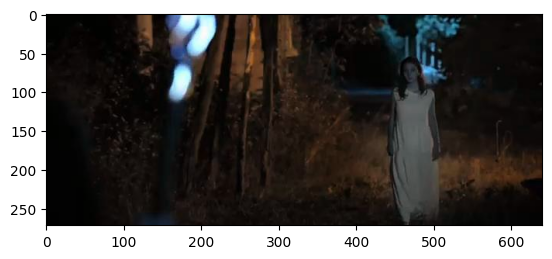

In [95]:
plt.imshow(img)

## Preprocessing data

In [118]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Ölçeklendirme için bir nesne oluşturma
datagen = ImageDataGenerator(rescale=1./255)

# Veri dizininden görüntüleri yükleme ve ölçeklendirme
train_generator = datagen.flow_from_directory(
        'ZiriCin',  # Eğitim verisi dizini
        target_size=(150, 150),  # Tüm görüntüleri aynı boyuta getir
        batch_size=32,
        class_mode='binary'  # İkili sınıflandırma için
)

Found 0 images belonging to 0 classes.


In [96]:
data_iterator = dataset.as_numpy_iterator() # Recreate the iterator
batch = data_iterator.next() # Now you can fetch a batch

In [97]:
batch[0].shape

(256, 256, 3)

In [98]:
len(batch)

32

In [99]:
batch[0].max()

255.0

In [100]:
scaled = batch [0] / 255
scaled.min()

0.0

In [101]:
dataset = dataset.map(lambda x: x/255)


In [102]:
dataset.as_numpy_iterator().next()

array([[[[0.02352941, 0.03921569, 0.05098039],
         [0.02352941, 0.03921569, 0.05098039],
         [0.02352941, 0.03921569, 0.05098039],
         ...,
         [0.01568628, 0.        , 0.        ],
         [0.0127451 , 0.        , 0.        ],
         [0.01176471, 0.        , 0.        ]],

        [[0.02352941, 0.03921569, 0.05098039],
         [0.02352941, 0.03921569, 0.05098039],
         [0.02352941, 0.03921569, 0.05098039],
         ...,
         [0.01568628, 0.        , 0.        ],
         [0.0127451 , 0.        , 0.        ],
         [0.01176471, 0.        , 0.        ]],

        [[0.02352941, 0.03921569, 0.05098039],
         [0.02352941, 0.03921569, 0.05098039],
         [0.02352941, 0.03921569, 0.05098039],
         ...,
         [0.01568628, 0.        , 0.        ],
         [0.0127451 , 0.        , 0.        ],
         [0.01176471, 0.        , 0.        ]],

        ...,

        [[0.00392157, 0.00392157, 0.01176471],
         [0.00392157, 0.00392157, 0.01176471]

In [103]:
len(dataset)

2

In [104]:
train_size = int(len(dataset)*.7)
val_size = int(len(dataset)*.2)
test_size = int(len(dataset)*.1)+1

In [105]:
train_size + val_size + test_size

2

In [106]:
train = dataset.take(train_size)
val = dataset.skip(train_size).take(val_size)
test = dataset.skip(train_size+val_size).take(test_size)

In [107]:
len(val)

0

In [108]:
model = Sequential()

In [109]:
model.add(Conv2D(16,(3,3) ,1, activation='sigmoid', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3) ,1, activation='sigmoid'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3) ,1, activation='sigmoid'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [110]:
model.compile('adam' , loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [111]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [112]:
logdir = 'logs'


In [113]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [114]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

ValueError: None values not supported.